In [2]:
## IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [3]:
## READING DATA 
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
## DATA EXPLORATION
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

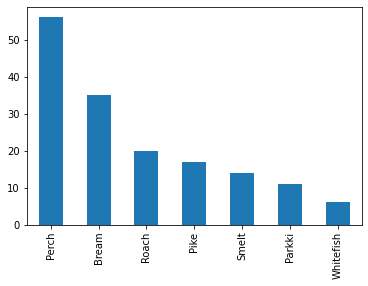

In [8]:
df['Species'].value_counts().plot.bar()

In [9]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


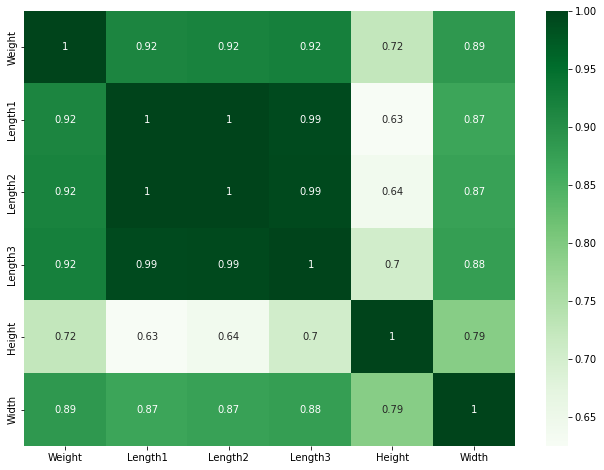

In [10]:
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [33]:
## DATA PREPARATION FOR MODELLING
X = df.drop(['Weight','Species'], axis=1)
y = df['Weight']

X.shape, y.shape
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [34]:
## CREATION OF MODELS 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ct = ColumnTransformer(transformers=
                       [('encoder', OneHotEncoder(), [0])],
                        remainder="passthrough")

transformed_X = ct.fit_transform( X, y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
X_test

<32x120 sparse matrix of type '<class 'numpy.float64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test, y_pred))

R2 Score 0.7687387141931


In [39]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=200,)
reg.fit(X_train, y_train)
X_train

<127x120 sparse matrix of type '<class 'numpy.float64'>'
	with 635 stored elements in Compressed Sparse Row format>

In [41]:
y_pred_reg = reg.predict(X_test)

In [42]:
## MODEL VALIDATION 
from sklearn.metrics import mean_squared_log_error, r2_score
print('Mean Squared Log Error', mean_squared_log_error(y_test, y_pred_reg))
print('R2 Score', r2_score(y_test, y_pred_reg))

Mean Squared Log Error 0.026403722669078585
R2 Score 0.9718624444979431


In [43]:
## SAVE MODEL
import pickle 
filename = 'model.pkl'
pickle.dump(reg, open(filename, 'wb'))